# [softmax]

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy  as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [37]:
# 1. SEED 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [38]:
# 2. 데이터 불러오기 & 파악하기
df = pd.read_csv('../dataset/wine.csv',header=None)
dataset = df.values
df[11].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: 11, dtype: int64

In [39]:
# 3. 데이터 분류
X = dataset[:,0:11].astype(float)
Y_obj = dataset[:,11].astype(int)
Y_obj

array([5, 5, 5, ..., 6, 7, 6])

In [40]:
# 4. 
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y

array([2, 2, 2, ..., 3, 4, 3], dtype=int64)

In [41]:
# 5. Y를 One hot encoding하기. 
from keras.utils import np_utils
Y_encoded = np_utils.to_categorical(Y)
Y_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
# 6. 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=11, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [43]:
# 7. 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
# 8. 모델 저장하기
# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

In [45]:
# 9. 모델 업데이트 및 저장
# delpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
# 
# heckpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
#                               verbose=1,save_best_only=True)

In [46]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100) 

In [47]:
# 모델 실행
history = model.fit(X, Y_encoded,
          validation_split=0.3, 
          epochs=2000, 
          batch_size=100,
          verbose=0, 
          callbacks=[early_stopping_callback])

In [48]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

6497/6497 [==============================] - 0s 12us/step

 Accuracy: 0.5244


In [49]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

In [50]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

<function matplotlib.pyplot.show(*args, **kw)>

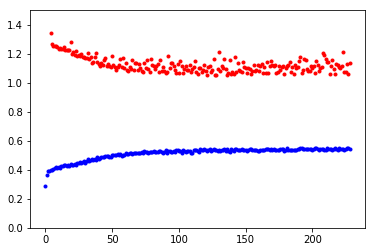

In [53]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c= "blue",markersize=3)
plt.ylim(0,1.5)
plt.show

# [선형회귀]

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy  as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [55]:
# 1. SEED 설정
seed = 1000
np.random.seed(seed)
tf.set_random_seed(seed)

In [56]:
# 2. 데이터 불러오기
df = pd.read_csv('../dataset/wine.csv',header=None)
dataset = df.values

In [57]:
# 3. 데이터 분류
X = dataset[:,0:11].astype(float)
y = dataset[:,11].astype(int)

In [58]:
# 4. 트레이닝 & 테스트 분류
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [59]:
model = Sequential()
model.add(Dense(30, input_dim=11, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [60]:
# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)
    
# modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [61]:
#checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
#                               verbose=1,save_best_only=True)

In [62]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100) 

In [63]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=500, batch_size=20,
                   verbose=0, callbacks=[early_stopping_callback])

In [64]:
# 모델의 학습이 어느 정도 되었는지 확인하기 위해 
# 예측 값과 실제 값을 비교하는 부분을 추가한다.

Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제등급:{:.0f},예상등급:{:.0f}".format(label,prediction))

실제등급:2,예상등급:3
실제등급:3,예상등급:3
실제등급:2,예상등급:3
실제등급:2,예상등급:2
실제등급:3,예상등급:3
실제등급:3,예상등급:3
실제등급:5,예상등급:3
실제등급:3,예상등급:4
실제등급:2,예상등급:2
실제등급:3,예상등급:3


In [65]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

In [66]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

<function matplotlib.pyplot.show(*args, **kw)>

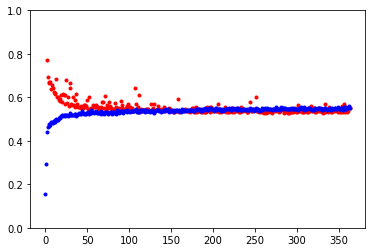

In [67]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c= "blue",markersize=3)
plt.ylim(0,1)
plt.show

# [Random Forest]

- https://github.com/coalastudy/data-science-lv1/blob/master/week6/wine.ipynb  
- https://myjamong.tistory.com/79

In [127]:
df = pd.read_csv('../dataset/wine.csv',header=None)
dataset = df.values

In [139]:
train_data = dataset[:,0:11].astype(float)
target_data = dataset[:,11].astype(int)

print(train_data.shape, target_data.shape)

(6497, 11) (6497,)


In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 

print(train_data.shape, x_train.shape, x_test.shape)

(6497, 11) (5197, 11) (1300, 11)


### Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

In [142]:
# train 데이터 학습
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [143]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 0.9321201107947156


### 모델 검증

In [144]:
y_predict = forest.predict(x_test)
print('실제 답:',y_test)
print('예측 답:',y_predict)
print('test set accuracy:', forest.score(x_test, y_test))

실제 답: [6 5 7 ... 7 5 6]
예측 답: [5.84 5.   6.26 ... 6.5  5.43 5.99]
test set accuracy: 0.5242921122175472


In [145]:
# 표로 예측값과 실제 답을 비교해보기
comparison = pd.DataFrame(y_test)

comparison['my_predict'] = y_predict
comparison.head()

,0,my_predict
0,6,5.84
1,5,5.00
2,7,6.26
3,5,4.83
4,5,5.63


### 평가지표

In [146]:
comparison = round(comparison) # 내용물을 모두 반올림하기
comparison.head()

,0,my_predict
0,6,6.0
1,5,5.0
2,7,6.0
3,5,5.0
4,5,6.0


In [147]:
evaluation = (comparison[0] == comparison['my_predict']) # 예측결과와 실제답이 같은지 확인
evaluation.head() # 예측과 실제답이 같을 경우만 True

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [148]:
success = (evaluation == True).sum() # 예측 성공건 수 카운팅
failure = (evaluation == False).sum() # 예측 실패건 수 카운팅

print(success / (success + failure)) # 예측 성공률 출력

0.6684615384615384


### 평가 함수 만들기

In [149]:
def my_score(result, answer):
    comparison = pd.DataFrame(answer)

    comparison['my_predict'] = result
    comparison = round(comparison)
    
    evaluation = (comparison[0] == comparison['my_predict'])
    success = (evaluation == True).sum()
    failure = (evaluation == False).sum()
    
    return (success / (success + failure))

predict_train = forest.predict(x_train)
predict_test = forest.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test)) # 바로 위에서 구한 예측성공률과 같은 값이 나온다

(category) train set accuracy 0.9551664421781797
(category) test set accuracy 0.6684615384615384
